In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

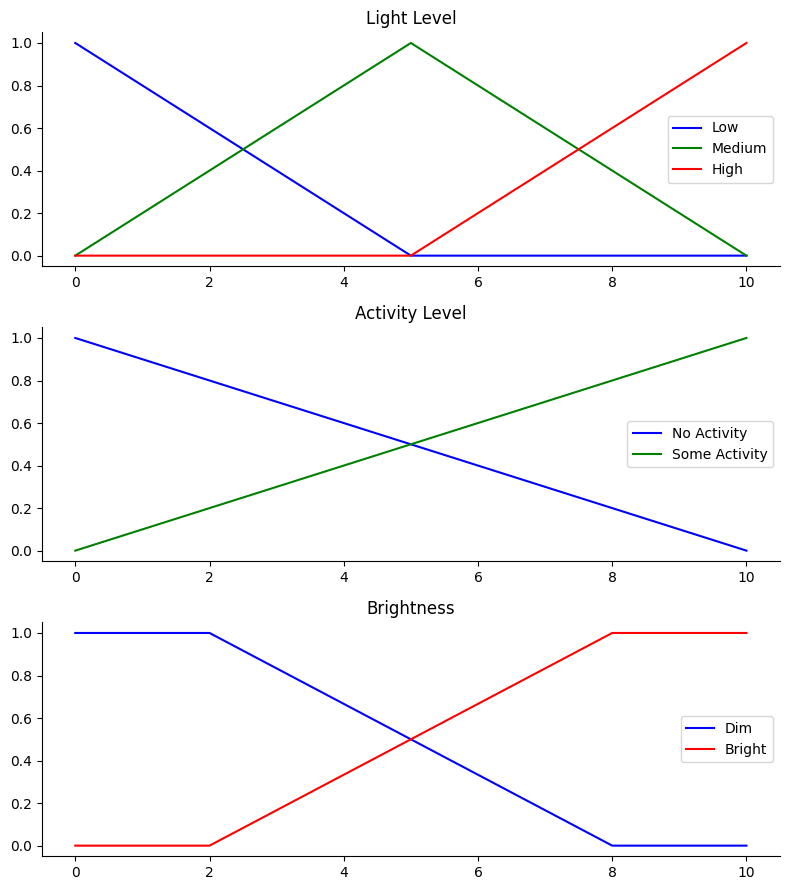

In [2]:
# Inisialisasikan batas atas dan bawah grafik
light_level = np.arange(0, 11, 1)  # Light level from 0 to 100
activity_level = np.arange(0, 11, 1)  # Activity level from 0 to 100
brightness = np.arange(0, 11, 1)  # Brightness level from 0 to 100

# Membuat grafik serta menentukan derajat keanggotaan
light_lo = fuzz.trimf(light_level, [0, 0, 5])
light_md = fuzz.trimf(light_level, [0, 5, 10])
light_hi = fuzz.trimf(light_level, [5, 10, 10])

activity_no = fuzz.trimf(activity_level, [0, 0, 10])
activity_some = fuzz.trimf(activity_level, [0, 10, 10])

brightness_lo = fuzz.trapmf(brightness, [0, 0, 2, 8])
brightness_hi = fuzz.trapmf(brightness, [2, 8, 10, 10])

# Visualisasikan grafik
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(light_level, light_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(light_level, light_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(light_level, light_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Light Level')
ax0.legend()

ax1.plot(activity_level, activity_no, 'b', linewidth=1.5, label='No Activity')
ax1.plot(activity_level, activity_some, 'g', linewidth=1.5, label='Some Activity')
ax1.set_title('Activity Level')
ax1.legend()

ax2.plot(brightness, brightness_lo, 'b', linewidth=1.5, label='Dim')
ax2.plot(brightness, brightness_hi, 'r', linewidth=1.5, label='Bright')
ax2.set_title('Brightness')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Membuat Grafik Dari Value Yang Ditentukan

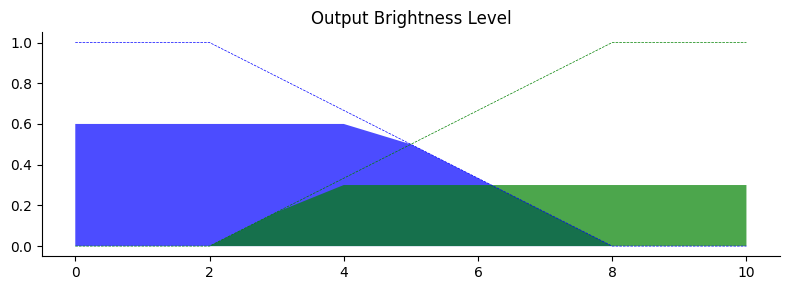

In [3]:
light_value = 7
activity_value = 3

light_level_lo = fuzz.interp_membership(light_level, light_lo, light_value)
light_level_md = fuzz.interp_membership(light_level, light_md, light_value)
light_level_hi = fuzz.interp_membership(light_level, light_hi, light_value)

activity_level_no = fuzz.interp_membership(activity_level, activity_no, activity_value)
activity_level_some = fuzz.interp_membership(activity_level, activity_some, activity_value)

# Aturan 1: Jika cahaya rendah DAN aktivitas tidak ada, maka kecerahan redup
rule1 = np.fmin(light_level_lo, activity_level_no)
brightness_activation_lo1 = np.fmin(rule1, brightness_lo)

# Aturan 2: Jika cahaya sedang DAN aktivitas tidak ada, maka kecerahan redup
rule2 = np.fmin(light_level_md, activity_level_no)
brightness_activation_lo2 = np.fmin(rule2, brightness_lo)

# Aturan 3: Jika cahaya tinggi DAN aktivitas tidak ada, maka kecerahan redup
rule3 = np.fmin(light_level_hi, activity_level_no)
brightness_activation_lo3 = np.fmin(rule3, brightness_lo)

# Aturan 4: Jika cahaya rendah DAN aktivitas ada, maka kecerahan terang
rule4 = np.fmin(light_level_lo, activity_level_some)
brightness_activation_hi1 = np.fmin(rule4, brightness_hi)

# Aturan 5: Jika cahaya sedang DAN aktivitas ada, maka kecerahan terang
rule5 = np.fmin(light_level_md, activity_level_some)
brightness_activation_hi2 = np.fmin(rule5, brightness_hi)

# Aturan 6: Jika cahaya tinggi DAN aktivitas ada, maka kecerahan redup
rule6 = np.fmin(light_level_hi, activity_level_some)
brightness_activation_lo4 = np.fmin(rule6, brightness_lo)

# Mengambil nilai maksimal dari rule 1, 2, 3, 6
brightness_activation_lo = np.fmax(brightness_activation_lo1,
                                    np.fmax(brightness_activation_lo2,
                                            np.fmax(brightness_activation_lo3, brightness_activation_lo4)))

# Mengambil nilai maksimal dari rule 4 & 5
brightness_activation_hi = np.fmax(brightness_activation_hi1, brightness_activation_hi2)

brightness0 = np.zeros_like(brightness)

fig, ax0 = plt.subplots(figsize=(8,3))

ax0.fill_between(brightness, brightness0, brightness_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(brightness, brightness_lo, 'b', linewidth=0.5, linestyle='--')

ax0.fill_between(brightness, brightness0, brightness_activation_hi, facecolor='g', alpha=0.7)
ax0.plot(brightness, brightness_hi, 'g', linewidth=0.5, linestyle='--')

ax0.set_title('Output Brightness Level')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

### Menentukan nilai akhir dengan cara defuzzifikasi

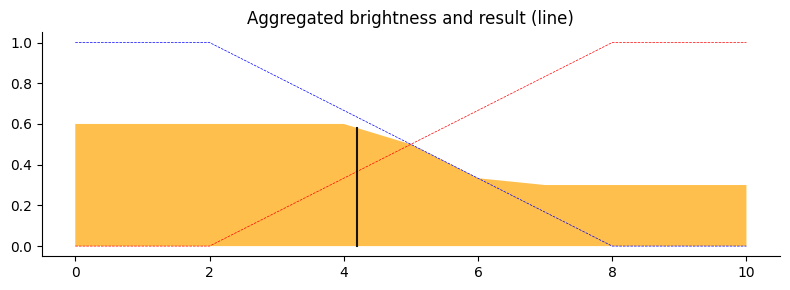

In [4]:
# Menghitung agregat dari aktivasi low dan high
aggregated = np.fmax(brightness_activation_lo, brightness_activation_hi)

x_brightness = fuzz.defuzz(brightness, aggregated, 'centroid')
brightness_activation = fuzz.interp_membership(brightness, aggregated, x_brightness)

fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(brightness, brightness_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(brightness, brightness_hi, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(brightness, brightness0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([x_brightness, x_brightness], [0, brightness_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated brightness and result (line)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()